# Связывание детектора и реидентификатора

Пока что детектором будет выступать yolo5s, но им может быть любая сеть. Визуальное тестирование проводиться на тестовой части датасета МОТ20

In [1]:
import pandas as pd
from os.path import join
from src.config import DATA_PATH
import matplotlib.pyplot as plt
import torch
import matplotlib.patches as patches
from src.data.mot import MOT20TestDatasetFrames, MOT20TestDatasetFramesRaw
from src.tracker import show_detections
from ultralytics import YOLO

## Загрузка тестовых данных

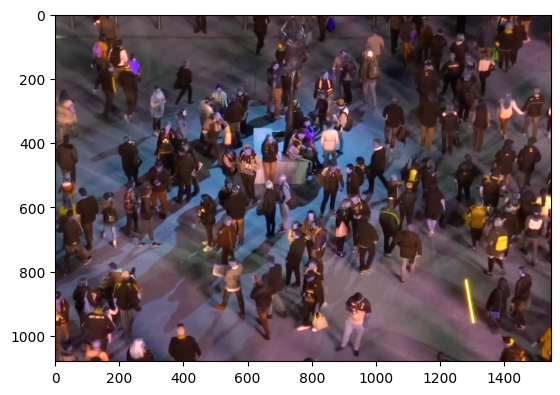

In [2]:
video_path = join(DATA_PATH, 'MOT20', 'test', 'MOT20-04')
video = MOT20TestDatasetFrames(video_path)
img, df = video[0]
plt.imshow(img)
plt.show()

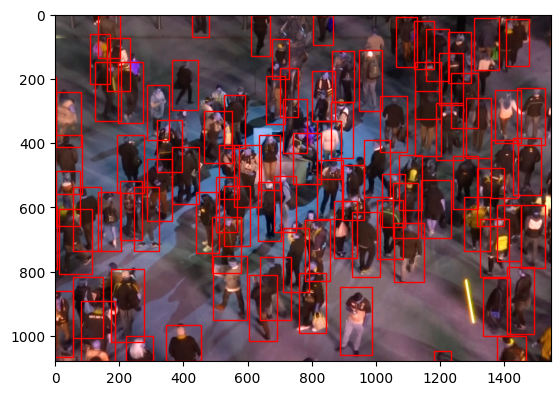

In [3]:
show_detections(img, df)

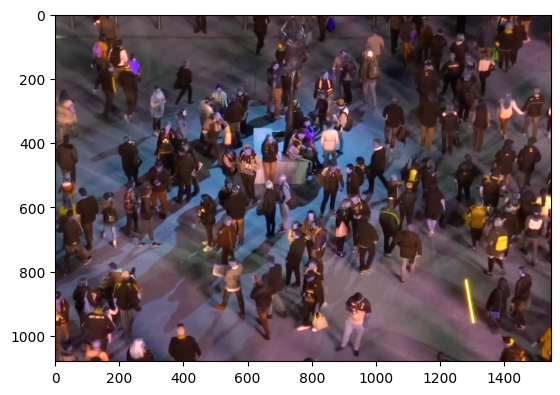

In [4]:
raw_video = MOT20TestDatasetFramesRaw(video_path)
plt.imshow(raw_video[0])

## Детектор

In [5]:
# detector = torch.load(f='models/yolov5s.pt')
# detector = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
detector = YOLO('yolov8n.pt')
detector

https://docs.ultralytics.com/modes/predict/#sources
| parameter | default | description
| - | - | -
| save_crop | False | save cropped images with results
| visualize | False | visualize model features

Выяснить, что будет оптимальнее - сохранять изображения или вырезать с картинки

In [6]:
res = detector.predict(img, save=True, imgsz=1984, classes=[0])
# detector.

/home/nick/reidentification/.venv/lib/python3.10/site-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0

0: 1408x1984 98 persons, 759.4ms
Speed: 35.4ms preprocess, 759.4ms inference, 7.2ms postprocess per image at shape (1, 3, 1984, 1984)
Results saved to /home/nick/reidentification/runs/detect/predict4


In [7]:
boxes = pd.DataFrame(
    res[0].boxes.data,
    columns=['x1', 'y1', 'x2', 'y2', 'confidence', 'class']
)
boxes

,x1,y1,x2,y2,confidence,class
0,871.289978,865.000488,985.014526,1067.249390,0.902171,0.0
1,1417.669556,783.306152,1482.889771,982.478088,0.865988,0.0
2,351.861755,961.488892,455.693756,1077.561035,0.836213,0.0
3,819.811157,449.349335,899.610657,632.329468,0.832288,0.0
4,643.422241,515.537537,703.192749,699.835999,0.827508,0.0
...,...,...,...,...,...,...
93,915.334595,454.855988,1006.212708,810.031616,0.285579,0.0
94,707.686890,264.857422,775.424194,441.157318,0.272245,0.0
95,55.519886,823.917786,190.640686,1059.069824,0.265475,0.0
96,54.196548,818.221680,119.690323,979.694824,0.262105,0.0


In [8]:
res[0].boxes[0].xywh

tensor([[928.1522, 966.1249, 113.7245, 202.2489]])

## Трекер

трекер это словарь состояний каждого объекта. мы храним его (координаты, ширина, высота) на предыдущих кадрах и фильтром калмана предсказываем будущие

In [9]:
tracks = {

}

tracks_example = {
    # id объекта
    1: {
        # кадры на которых был обнаружен или вычислен фильтром калмана
        'frames': [1, 2, 3, 4],
        # x, y, width, height для каждого кадра, где обнаружен
        'boxes': [
            (25, 1, 256, 128),
            (26, 1, 256, 128),
            (28, 1, 256, 128),
            (32, 2, 256, 128),
        ],
        # последний кадр на котором он был распознан по изображению
        'last_detection': 2
    }
}

## Реидентификация

$T_{lost}$ - количество кадров после которых объект не отслеживается если не было детекций

for object in tracker:
    
    if $T_{lost}$(object) > $T_{lost}$: del object
    
    else

         find_nearest(objects)
        

In [10]:
def reid(prev_frame, current_frame):
    pass

def get_neighbour(object_id, detections):
    pass

def get_frames_predict(object_frame1, object_frame2):
    pass

## Применение алгоритма deep SORT

In [11]:
from deep_sort_realtime.deepsort_tracker import DeepSort

In [12]:
boxes2 = boxes.copy()
boxes2['left'] = boxes2['x1']
boxes2['top'] = boxes2['y1']
boxes2['w'] = boxes2['x2'] - boxes2['x1']
boxes2['h'] = boxes2['y2'] - boxes2['y1']
# boxes2 = boxes2.drop(labels=['confidence', 'class', 'x2', 'y2', 'x1', 'y1'], axis=1)
boxes2

,x1,y1,x2,y2,confidence,class,left,top,w,h
0,871.289978,865.000488,985.014526,1067.249390,0.902171,0.0,871.289978,865.000488,113.724548,202.248901
1,1417.669556,783.306152,1482.889771,982.478088,0.865988,0.0,1417.669556,783.306152,65.220215,199.171936
2,351.861755,961.488892,455.693756,1077.561035,0.836213,0.0,351.861755,961.488892,103.832001,116.072144
3,819.811157,449.349335,899.610657,632.329468,0.832288,0.0,819.811157,449.349335,79.799500,182.980133
4,643.422241,515.537537,703.192749,699.835999,0.827508,0.0,643.422241,515.537537,59.770508,184.298462
...,...,...,...,...,...,...,...,...,...,...
93,915.334595,454.855988,1006.212708,810.031616,0.285579,0.0,915.334595,454.855988,90.878113,355.175629
94,707.686890,264.857422,775.424194,441.157318,0.272245,0.0,707.686890,264.857422,67.737305,176.299896
95,55.519886,823.917786,190.640686,1059.069824,0.265475,0.0,55.519886,823.917786,135.120804,235.152039
96,54.196548,818.221680,119.690323,979.694824,0.262105,0.0,54.196548,818.221680,65.493774,161.473145


In [13]:
# bbs = list(boxes2.itertuples(index=False, name=None))
# list(torch.tensor([boxes2['left'].values, boxes2['top'].values,  boxes2['w'], boxes2['h']],).T)
bbs = list(zip(zip(
    boxes2['left'].values,
    boxes2['top'].values,
    boxes2['w'].values,
    boxes2['h'].values
), boxes2['confidence'], boxes2['class']))

In [14]:
tracker = DeepSort(max_age=5)
tracks = tracker.update_tracks(raw_detections=bbs, frame=img)

In [20]:
from deep_sort_realtime.deep_sort.track import Track
tracks[1].to_ltrb()

array([     1417.7,      783.31,      1482.9,      982.48], dtype=float32)